In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-10bird-recording/dataset/metadata/Attilacinnamomeuscnt_Brazil/page1.json
/kaggle/input/dataset-10bird-recording/dataset/metadata/BeardedBellbirdcnt_Brazil/page1.json
/kaggle/input/dataset-10bird-recording/dataset/metadata/Guiraguiracnt_Brazil/page1.json
/kaggle/input/dataset-10bird-recording/dataset/metadata/Habiarubicacnt_Brazil/page1.json
/kaggle/input/dataset-10bird-recording/dataset/metadata/Willisornisviducnt_Brazil/page1.json
/kaggle/input/dataset-10bird-recording/dataset/metadata/Araseveruscnt_Brazil/page1.json
/kaggle/input/dataset-10bird-recording/dataset/metadata/Lanioversicolorcnt_Brazil/page1.json
/kaggle/input/dataset-10bird-recording/dataset/metadata/Willisornisviduacnt_Brazil/page1.json
/kaggle/input/dataset-10bird-recording/dataset/metadata/Attilarufuscnt_Brazil/page1.json
/kaggle/input/dataset-10bird-recording/dataset/metadata/Taperanaeviacnt_Brazil/page1.json
/kaggle/input/dataset-10bird-recording/dataset/metadata/Piayacayanacnt_Brazil/page1.json

In [2]:
!pip install xeno-canto

  Preparing metadata (setup.py) ... done
  Created wheel for xeno-canto: filename=xeno_canto-3.0-py3-none-any.whl size=8705 sha256=0a80dc7d183820eb2dd9a42f013577c18b573665232508714e745a81edb61c72
  Stored in directory: /root/.cache/pip/wheels/c2/ae/42/bdf461516714e4027218d17b987fae56e77c6ffa52b24c4141
Successfully built xeno-canto


In [7]:
import zipfile
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
# Load a sample audio file
sample_audio_path = '/kaggle/input/dataset-10bird-recording/dataset/audio/BeardedBellbird/1422.mp3'

# Resample the audio
def resample_audio(audio_path, target_sr=16000):
    y, sr = librosa.load(audio_path, sr=target_sr)
    return y, sr
resampled_audio, sr = resample_audio(sample_audio_path)
print(f"Sample rate after Resampling: {sr}")

Sample rate after Resampling: 16000


In [15]:
import librosa
from scipy.signal import butter, filtfilt
import numpy as np
import os
import matplotlib.pyplot as plt

In [16]:
# Apply filtering
def butter_lowpass_filter(data, cutoff_freq, sample_rate, order=4):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    print(f"Filtered audio shape: {filtered_data.shape}")
    return filtered_data

filtered_audio = butter_lowpass_filter(resampled_audio, cutoff_freq=4000, sample_rate=sr)

Filtered audio shape: (112014,)


In [17]:
# Convert audio data to the model’s expected input
def convert_to_model_input(y, target_length):
    if len(y) < target_length:
        y = np.pad(y, (0, target_length - len(y)))
    else:
        y = y[:target_length]
    return y

model_input = convert_to_model_input(filtered_audio, target_length=16000)
print(f"Model input shape: {model_input.shape}")

Model input shape: (16000,)


In [18]:
# Load a sample audio file
sample_audio_path = '/kaggle/input/dataset-10bird-recording/dataset/audio/Chestnut-frontedMacaw/119166.mp3'

# Resample the audio
def resample_audio(audio_path, target_sr=16000):
    y, sr = librosa.load(audio_path, sr=target_sr)
    return y, sr
resampled_audio, sr = resample_audio(sample_audio_path)
print(f"Sample rate after Resampling: {sr}")

Sample rate after Resampling: 16000


In [19]:
# Apply filtering
def butter_lowpass_filter(data, cutoff_freq, sample_rate, order=4):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    print(f"Filtered audio shape: {filtered_data.shape}")
    return filtered_data

filtered_audio = butter_lowpass_filter(resampled_audio, cutoff_freq=4000, sample_rate=sr)

Filtered audio shape: (224445,)


In [20]:
# Convert audio data to the model’s expected input
def convert_to_model_input(y, target_length):
    if len(y) < target_length:
        y = np.pad(y, (0, target_length - len(y)))
    else:
        y = y[:target_length]
    return y

model_input = convert_to_model_input(filtered_audio, target_length=16000)
print(f"Model input shape: {model_input.shape}")

Model input shape: (16000,)


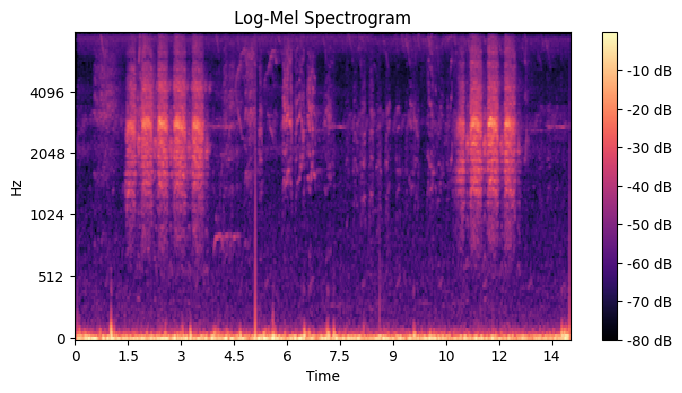

In [22]:
# visualizing log-mel spectrogram
def compute_logmel_spectrogram(y, sr, n_mels=128, hop_length=512):
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length)
    logmel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return logmel_spectrogram

# load the audio file
audio_file_path = '/kaggle/input/dataset-10bird-recording/dataset/audio/Chestnut-frontedMacaw/119166.mp3'
target_sr = 16000

# Load the audio file
y, sr = librosa.load(audio_file_path, sr=target_sr)

# Compute log-mel spectrogram
logmel_spectrogram = compute_logmel_spectrogram(y, sr=sr)

# Display the log-mel spectrogram
plt.figure(figsize=(8, 4))
librosa.display.specshow(logmel_spectrogram, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')
plt.show()

In [23]:
# Set the path to dataset folder
data_dir = r'/kaggle/input/dataset-10bird-recording/dataset/audio'

# Load and preprocess audio data using spectrograms
labels = os.listdir(data_dir)
audio_data = []
target_labels = []

for label in labels:
    label_dir = os.path.join(data_dir, label)
    for audio_file in os.listdir(label_dir):
        audio_path = os.path.join(label_dir, audio_file)
        y, sr = librosa.load(audio_path, duration=3)  # Load audio and limit to 3 seconds
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
        # Transpose the spectrogram to have the shape (timesteps, n_mels)
        spectrogram = spectrogram.T
        audio_data.append(spectrogram)
        target_labels.append(label)

Note: Illegal Audio-MPEG-Header 0x74882f48 at offset 14243.
Note: Trying to resync...
Note: Skipped 63 bytes in input.
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1152
  warnings.warn(
Note: Illegal Audio-MPEG-Header 0x5332e393 at offset 14239.
Note: Trying to resync...
Note: Skipped 18 bytes in input.
Note: Illegal Audio-MPEG-Header 0xa26e6961 at offset 70552.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x8e5b527a at offset 14243.
Note: Trying to resync...
Note: Skipped 376 bytes in input.
Note: Illegal Audio-MPEG-Header 0xd7dd2bdd at offset 14243.
Note: Trying to resync...
Note: Skipped 376 bytes in input.
[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!
Note: Illegal Audio-MPEG-Header 0x79ff9771 at offset 14447.
Note: Trying to resync...
Note: Skipped 192 bytes in input.


In [24]:
# Encode target labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(target_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(audio_data, encoded_labels, test_size=0.2, random_state=42)

# Ensure all spectrograms have the same shape
max_length = max([spec.shape[0] for spec in audio_data])
X_train = [np.pad(spec, ((0, max_length - spec.shape[0]), (0, 0)), mode='constant') for spec in X_train]
X_test = [np.pad(spec, ((0, max_length - spec.shape[0]), (0, 0)), mode='constant') for spec in X_test]

# Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

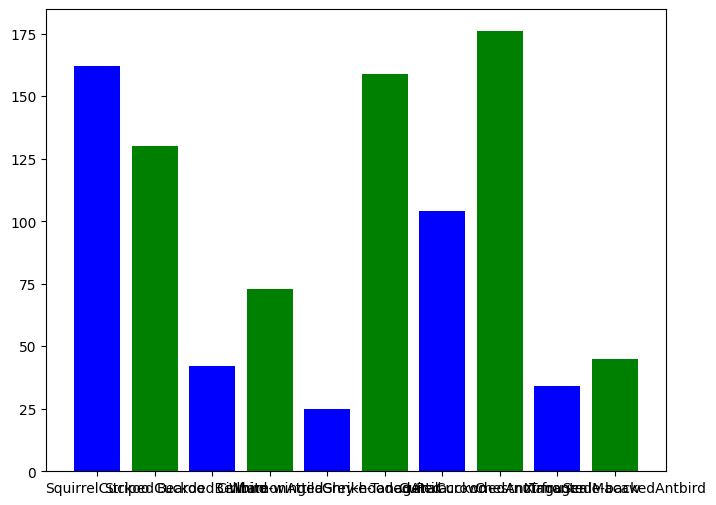

In [31]:
# Count the number of samples in each class
class_counts = [len(os.listdir(os.path.join(data_dir, label))) for label in labels]
# Define colors for each class
class_colors = ['blue', 'green']
# Create a bar chart to visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar(labels, class_counts, color=class_colors)
# plt.xlabel(r'/kaggle/input/dataset-10bird-recording/dataset/audio')
# plt.ylabel(r'/kaggle/input/dataset-10bird-recording/dataset/audio/Chestnut-frontedMacaw/119166.mp3')
# plt.title(&amp;amp;quot;Class Distribution&amp;amp;quot;)
plt.show()

In [35]:
# Convert the data to a flat 2D shape
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Create Gradient Boosting classifier
model = GradientBoostingClassifier(random_state=42)
# Train the model
model.fit(X_train_flat, y_train)

# Make predictions
y_pred = model.predict(X_test_flat)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(r'/kaggle/input/dataset-10bird-recording/dataset/audio',Accuracy: {:.4f},r'/kaggle/input/dataset-10bird-recording/dataset/audio'.format(accuracy))
# print(&amp;amp;quot;F1 score: {:.4f}&amp;amp;quot;.format(f1))

SyntaxError: invalid decimal literal (1911061866.py, line 17)

In [37]:
!pip install tensorflow

In [39]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.keras.models import load_model

In [40]:
# Define your folder structure
data_dir = '/kaggle/input/dataset-10bird-recording/dataset/audio'
classes = ['Chestnut-frontedMacaw','CinnamonAttila','Grey-hoodedAttila','GuiraCuckoo','Red-crownedAntTanager','SquirrelCuckoo','StripedCuckoo','White-wingedShrike-Tanager','XinguScale-backedAntbird']

# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(128, 128)):
    data = []
    labels = []
    
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.mp3'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Perform preprocessing (e.g., convert to Mel spectrogram and resize)
                mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                data.append(mel_spectrogram)
                labels.append(i)
    
    return np.array(data), np.array(labels)

# Split data into training, validation and testing sets
data, labels = load_and_preprocess_data(data_dir, classes)
labels = to_categorical(labels, num_classes=len(classes))  # Convert labels to one-hot encoding
X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# Then, split the training+validation set into training and validation sets (75% train, 25% val)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")




I0000 00:00:1745923635.653912      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745923635.654750      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
Note: Illegal Audio-MPEG-Header 0x28417474 at offset 395431.
Note: Trying to resync...
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1349] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).
/tmp/ipykernel_31/1492457097.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecat

Training set size: 544
Validation set size: 182
Testing set size: 182


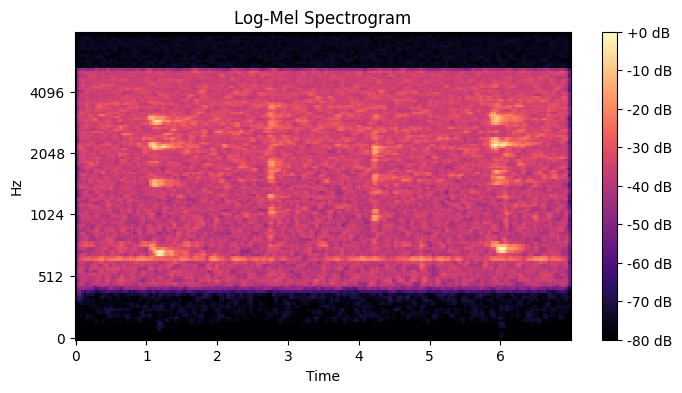

In [51]:
# visualizing log-mel spectrogram
def compute_logmel_spectrogram(y, sr, n_mels=128, hop_length=512):
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length)
    logmel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return logmel_spectrogram

# load the audio file
audio_file_path = r'/kaggle/input/dataset-10bird-recording/dataset/audio/BeardedBellbird/1422.mp3'
target_sr = 16000

# Load the audio file
y, sr = librosa.load(audio_file_path, sr=target_sr)

# Compute log-mel spectrogram
logmel_spectrogram = compute_logmel_spectrogram(y, sr=sr)

# Display the log-mel spectrogram
plt.figure(figsize=(8, 4))
librosa.display.specshow(logmel_spectrogram, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')
plt.show()

In [41]:
# Create a neural network model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(len(classes), activation='softmax')(x)
model = Model(input_layer, output_layer)


In [42]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200


I0000 00:00:1745923870.471859     159 service.cc:148] XLA service 0x78526000bbe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745923870.472842     159 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745923870.472865     159 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745923870.783455     159 cuda_dnn.cc:529] Loaded cuDNN version 90300


14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2677 - loss: 5.7902

I0000 00:00:1745923874.073635     159 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.2723 - loss: 5.5286 - val_accuracy: 0.2582 - val_loss: 2.4527
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4613 - loss: 1.8482 - val_accuracy: 0.2363 - val_loss: 2.1508
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4981 - loss: 1.5634 - val_accuracy: 0.2637 - val_loss: 2.3208
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5992 - loss: 1.2334 - val_accuracy: 0.3242 - val_loss: 2.7254
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7238 - loss: 1.0033 - val_accuracy: 0.3187 - val_loss: 3.5842
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7819 - loss: 0.7030 - val_accuracy: 0.3132 - val_loss: 4.9418
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8316 - loss: 0.5928 - val_accuracy: 0.3462 - val_loss: 5.1261
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8906 - loss: 0.3664 - val_accuracy: 0.3736 - val_

In [44]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.34065935015678406


In [47]:
# Save the model
model.save('/kaggle/working/my_model.h5')

In [49]:
# Load the saved model
model = load_model('audio_classification_model.h5')

# Define the target shape for input spectrograms
target_shape = (128, 128)

# Define your class labels
classes = ['Chestnut-frontedMacaw','CinnamonAttila','Grey-hoodedAttila','GuiraCuckoo','Red-crownedAntTanager','SquirrelCuckoo','StripedCuckoo','White-wingedShrike-Tanager','XinguScale-backedAntbird']

# Function to preprocess and classify an audio file
def test_audio(file_path, model):
    # Load and preprocess the audio file
    audio_data, sample_rate = librosa.load(file_path, sr=None)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
    mel_spectrogram = tf.reshape(mel_spectrogram, (1,) + target_shape + (1,))
    
    # Make predictions
    predictions = model.predict(mel_spectrogram)
    
    # Get the class probabilities
    class_probabilities = predictions[0]
    
    # Get the predicted class index
    predicted_class_index = np.argmax(class_probabilities)
    
    return class_probabilities, predicted_class_index

# Test an audio file
test_audio_file = r'/kaggle/input/dataset-10bird-recording/dataset/audio/BeardedBellbird/1422.mp3'
class_probabilities, predicted_class_index = test_audio(test_audio_file, model)

# Display results for all classes
for i, class_label in enumerate(classes):
    probability = class_probabilities[i]
    print(f'Class: {class_label}, Probability: {probability:.4f}')

# Calculate and display the predicted class and accuracy
predicted_class = classes[predicted_class_index]
accuracy = class_probabilities[predicted_class_index]
print(f'The audio is classified as: {predicted_class}')
print(f'Accuracy: {accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
Class: Chestnut-frontedMacaw, Probability: 0.0001
Class: CinnamonAttila, Probability: 0.0951
Class: Grey-hoodedAttila, Probability: 0.0171
Class: GuiraCuckoo, Probability: 0.0378
Class: Red-crownedAntTanager, Probability: 0.4011
Class: SquirrelCuckoo, Probability: 0.3692
Class: StripedCuckoo, Probability: 0.0722
Class: White-wingedShrike-Tanager, Probability: 0.0016
Class: XinguScale-backedAntbird, Probability: 0.0057
The audio is classified as: Red-crownedAntTanager
Accuracy: 0.4011
